BASIC:
Drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip, including queuing

LIMITED:
Drinking water from an improved source, for which collection time exceeds 30 minutes for a round trip, including queuing

UNIMPROVED:
Drinking water from an unprotected dug well or unprotected spring

SURFACE WATER:
Drinking water directly from a river, dam, lake, pond, stream, canal or irrigation canal


**Meaning of columns**:

pop_n = total population

pop_u = urban population

wat_bas_n = at least basic water

wat_lim_n = limited water

wat_unimp_n = unimproved water

water_sur_n = surface water

the rest are same but separated specific to either rural or urban based on the last letter that ends the column name
(i.e r for rural, u for urban)

sourced from https://data.unicef.org/topic/water-and-sanitation/drinking-water/

**Imports**

In [3]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import joblib
from joblib import parallel_backend
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score,silhouette_score

In [5]:
# drive.mount('/content/drive')

**Data Loading and Data Cleaning**


In [7]:
df = pd.read_csv("Estimates of the use of water (2000-2020).csv")

In [8]:
df.tail(20)

name  year        pop_n      pop_u  \
444                        Mozambique  2015  27042.00195  34.400002   
445                      Burkina Faso  2015  18110.61523  27.530001   
446                          Ethiopia  2020  114963.5859  21.695000   
447                        Madagascar  2015  24234.08008  35.192997   
448                           Somalia  2015   13797.2041  43.245003   
449                            Uganda  2015  38225.44531  22.059999   
450                      Burkina Faso  2020  20903.27734  30.607000   
451                             Niger  2020  24206.63672  16.625999   
452                              Chad  2020  16425.85938  23.520000   
453  Democratic Republic of the Congo  2020  89561.40625  45.638000   
454                             Niger  2015  20001.66211  16.247000   
455                  Papua New Guinea  2020  8947.027344  13.345000   
456                              Chad  2015   14110.9707  22.515001   
457  Democratic Republic of the Congo  2015  76244.53125  42.739998   
458          Central African Republic  2015  4493.170898  40.277000   
459                          Ethiopia  2015  100835.4531  19.428001   
460                  Papua New Guinea  2015  8107.771973  13.012000   
461                       South Sudan  2015  10715.65723  18.851999   
462                       South Sudan  2020  11193.72852  20.198999   
463          Central African Republic  2020   4829.76416  42.197998   

     wat_bas_n  wat_lim_n  wat_unimp_n  wat_sur_n  wat_bas_r  wat_lim_r  \
444  51.176175  10.371408    26.513493  11.938923  35.971379  12.367080   
445  50.137131  25.673541    22.430179   1.759149  38.855164  30.202185   
446  49.615573  26.740720    18.635060   5.008647  40.030139  30.186683   
447  48.891774   2.677160    30.406737  18.024330  33.144578   1.743479   
448  48.711154  23.406188    20.154107   7.728552  29.228193  28.887149   
449  47.841558  30.095404    15.106768   6.956269  39.717003  34.176563   
450  47.214854  31.273003    21.158633   0.353510  32.718259  38.626903   
451  46.911797  21.653899    27.027512   4.406791  39.154159  23.987740   
452  46.187535  14.740289    31.562457   7.509719  37.575215  14.353961   
453  45.952127  13.441224    32.542316   8.064332  21.982792  12.682941   
454  45.482458  16.128837    34.719560   3.669145  37.329942  17.643595   
455  45.344018   2.128564    22.157625  30.369793  39.071344   2.429850   
456  44.399097  13.516383    34.702740   7.381780  35.578901  13.876414   
457  42.718180  12.687299    34.284025  10.310496  20.622514  11.516894   
458  42.311345  21.343997    32.010174   4.334483  31.891408  17.357854   
459  42.070067  21.738790    24.477856  11.713286  32.451767  23.598552   
460  41.485508   1.809953    21.261052  35.443486  34.990633   1.804724   
461  41.247509  30.695737    13.554393  14.502360  36.726780  32.662800   
462  40.950927  37.426963    13.537555   8.084555  33.593629  42.164381   
463  37.202402  25.682373    33.539114   3.576111  28.106594  19.405890   

     wat_unimp_r  wat_sur_r  wat_bas_u  wat_lim_u  wat_unimp_u      wat_sur_u  
444    34.814874  16.846667  80.171366   6.565710    10.682954    2.579970181  
445    28.648694   2.293957  79.835792  13.752335     6.060553   0.3513198178  
446    23.495613   6.287564  84.212828  14.303009     1.091582    0.392580896  
447    39.698000  25.413943  77.889831   4.396510    13.297114    4.416545719  
448    28.975789  12.908870  74.280709  16.212942     8.576478   0.9298710922  
449    17.519117   8.587316  76.546356  15.676293     6.583719    1.193631242  
450    28.340446   0.314393  80.081919  14.600049     4.875836   0.4421957805  
451    31.991506   4.866594  85.813840   9.950441     2.134688    2.101031634  
452    38.524968   9.545856  74.192223  15.996514     8.922453   0.8888103843  
453    51.215982  14.118285  74.503355  14.344458    10.299059   0.8531284131  
454    40.888488   4.137976  87.508539   8.320286     2.918844    1.252330425  
455  

**Data Analysis**

In [10]:
df.describe()

year       pop_u   wat_bas_n   wat_lim_n  wat_unimp_n  \
count   464.000000  464.000000  461.000000  461.000000   461.000000   
mean   2017.398707   60.890215   89.174871    3.675032     4.984907   
std       2.459714   25.052383   15.489866    6.513164     7.522532   
min    2015.000000    0.000000   37.202402    0.000000     0.000000   
25%    2015.000000   41.839750   85.495601    0.000000     0.108476   
50%    2015.500000   62.281998   96.604139    0.406530     1.344803   
75%    2020.000000   81.416750   99.765173    4.692599     6.163618   
max    2020.000000  100.000000  100.000005   37.426963    34.719560   

        wat_sur_n   wat_bas_r   wat_lim_r  wat_unimp_r   wat_sur_r  \
count  446.000000  339.000000  339.000000   339.000000  330.000000   
mean     2.238010   79.453935    5.846687     9.712588    5.122794   
std      4.420156   22.426280    8.269319    12.190953    7.732253   
min      0.000000   20.622514    0.000000     0.000000    0.000000   
25%      0.000000   62.353529    0.000000     0.352567    0.000000   
50%      0.009381   89.875800    1.804724     4.310939    0.713097   
75%      2.303579   98.587231    8.768605    15.371147    7.727167   
max     35.443486  100.000000   42.164381    51.215982   41.629254   

        wat_bas_u   wat_lim_u  wat_unimp_u  
count  364.000000  364.000000   364.000000  
mean    94.170999    3.292272     2.135052  
std      8.141636    5.380358     3.508875  
min     49.661665    0.000000     0.000000  
25%     91.009838    0.000000     0.000000  
50%     97.836161    0.671124     0.639986  
75%     99.866205    4.234145     2.662380  
max    100.000000   34.279780    19.835807

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         464 non-null    object 
 1   year         464 non-null    int64  
 2   pop_n        464 non-null    object 
 3   pop_u        464 non-null    float64
 4   wat_bas_n    461 non-null    float64
 5   wat_lim_n    461 non-null    float64
 6   wat_unimp_n  461 non-null    float64
 7   wat_sur_n    446 non-null    float64
 8   wat_bas_r    339 non-null    float64
 9   wat_lim_r    339 non-null    float64
 10  wat_unimp_r  339 non-null    float64
 11  wat_sur_r    330 non-null    float64
 12  wat_bas_u    364 non-null    float64
 13  wat_lim_u    364 non-null    float64
 14  wat_unimp_u  364 non-null    float64
 15  wat_sur_u    361 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage: 58.1+ KB


In [12]:
df['pop_n'] = df['pop_n'].astype(str).str.replace(' ', '').astype(float)

In [13]:
# Check unique values in column 'A'
unique_values_A = df['wat_sur_u'].unique()
print("Unique values in column 'wat_sur_u':", unique_values_A)

Unique values in column 'wat_sur_u': ['0' nan '0.06171' '0.08140909465' '0.2583266934' '0.6409843843'
 '0.01562531586' '0.1173091586' '0.3991837074' '0.09' '0.138'
 '0.02419708411' '0.2' '0.3882429922' '0.118' '0.2875847035'
 '0.3264261435' '0.06419054206' '0.01084585945' '0.002585454545'
 '0.4663712861' '0.3103465922' '0.2714306142' '0.322' '0.0874287017'
 '0.1597056849' '0.4652264446' '0.3041124414' '0.06505789753'
 '0.2260230112' '0.00768467364' '0.1613539953' '0.1494454068'
 '0.03566604616' '0.1902459339' '0.1313629588' '0.1498202281'
 '0.2080250227' '0.1525436393' '0.3049508197' '0.1571428571' '0.34046355'
 '0.2373001538' '0.304941615' '0.3285312153' '0.3360523291'
 '0.06372315036' '0.3342044223' '0.9616622585' '0.35652434' '0.2675555532'
 '0.1467727616' '1.04821651' '0.2478216409' '1.07032397' '0.07878421819'
 '0.0408679538' '0.4886654211' '0.6481873668' '0.02255092798'
 '2.741830931' '0.4166621911' '2.007293339' '0.2414834229' '0.2495174846'
 '0.1329489253' '0.1828868106' '0.340

Most of the columns have a large number of null values. I will be using the median to replace the null values.

In [15]:
for column in df.columns:
    if df[column].isnull().any():  # Check if there are null values in the column
        # Attempt to convert the column to numeric, handling errors
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        except ValueError:
            print(f"Could not convert column '{column}' to numeric. Skipping...")
            continue  # Skip to the next column if conversion fails

        median_value = df[column].median()  # Calculate median after conversion
        df[column].fillna(median_value, inplace=True)  # Replace nulls with median

C:\Users\user\AppData\Local\Temp\ipykernel_13692\4200440826.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)  # Replace nulls with median


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         464 non-null    object 
 1   year         464 non-null    int64  
 2   pop_n        464 non-null    float64
 3   pop_u        464 non-null    float64
 4   wat_bas_n    464 non-null    float64
 5   wat_lim_n    464 non-null    float64
 6   wat_unimp_n  464 non-null    float64
 7   wat_sur_n    464 non-null    float64
 8   wat_bas_r    464 non-null    float64
 9   wat_lim_r    464 non-null    float64
 10  wat_unimp_r  464 non-null    float64
 11  wat_sur_r    464 non-null    float64
 12  wat_bas_u    464 non-null    float64
 13  wat_lim_u    464 non-null    float64
 14  wat_unimp_u  464 non-null    float64
 15  wat_sur_u    464 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 58.1+ KB


In [17]:
# Percentage of rural population
df['pop_r'] = 100 - df["pop_u"]

In [18]:
# General Overview
def dataset_overview(data):
    print("Dataset Overview:\n")
    print("Shape:", data.shape)
    print("Columns:\n", data.columns.tolist())
    print("\nData Types:\n", data.dtypes)
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nSummary Statistics:\n", data.describe())

dataset_overview(df)

Dataset Overview:

Shape: (464, 17)
Columns:
 ['name', 'year', 'pop_n', 'pop_u', 'wat_bas_n', 'wat_lim_n', 'wat_unimp_n', 'wat_sur_n', 'wat_bas_r', 'wat_lim_r', 'wat_unimp_r', 'wat_sur_r', 'wat_bas_u', 'wat_lim_u', 'wat_unimp_u', 'wat_sur_u', 'pop_r']

Data Types:
 name            object
year             int64
pop_n          float64
pop_u          float64
wat_bas_n      float64
wat_lim_n      float64
wat_unimp_n    float64
wat_sur_n      float64
wat_bas_r      float64
wat_lim_r      float64
wat_unimp_r    float64
wat_sur_r      float64
wat_bas_u      float64
wat_lim_u      float64
wat_unimp_u    float64
wat_sur_u      float64
pop_r          float64
dtype: object

Missing Values:
 name           0
year           0
pop_n          0
pop_u          0
wat_bas_n      0
wat_lim_n      0
wat_unimp_n    0
wat_sur_n      0
wat_bas_r      0
wat_lim_r      0
wat_unimp_r    0
wat_sur_r      0
wat_bas_u      0
wat_lim_u      0
wat_unimp_u    0
wat_sur_u      0
pop_r          0
dtype: int64

Summary 

**Exploratory Data Analysis**

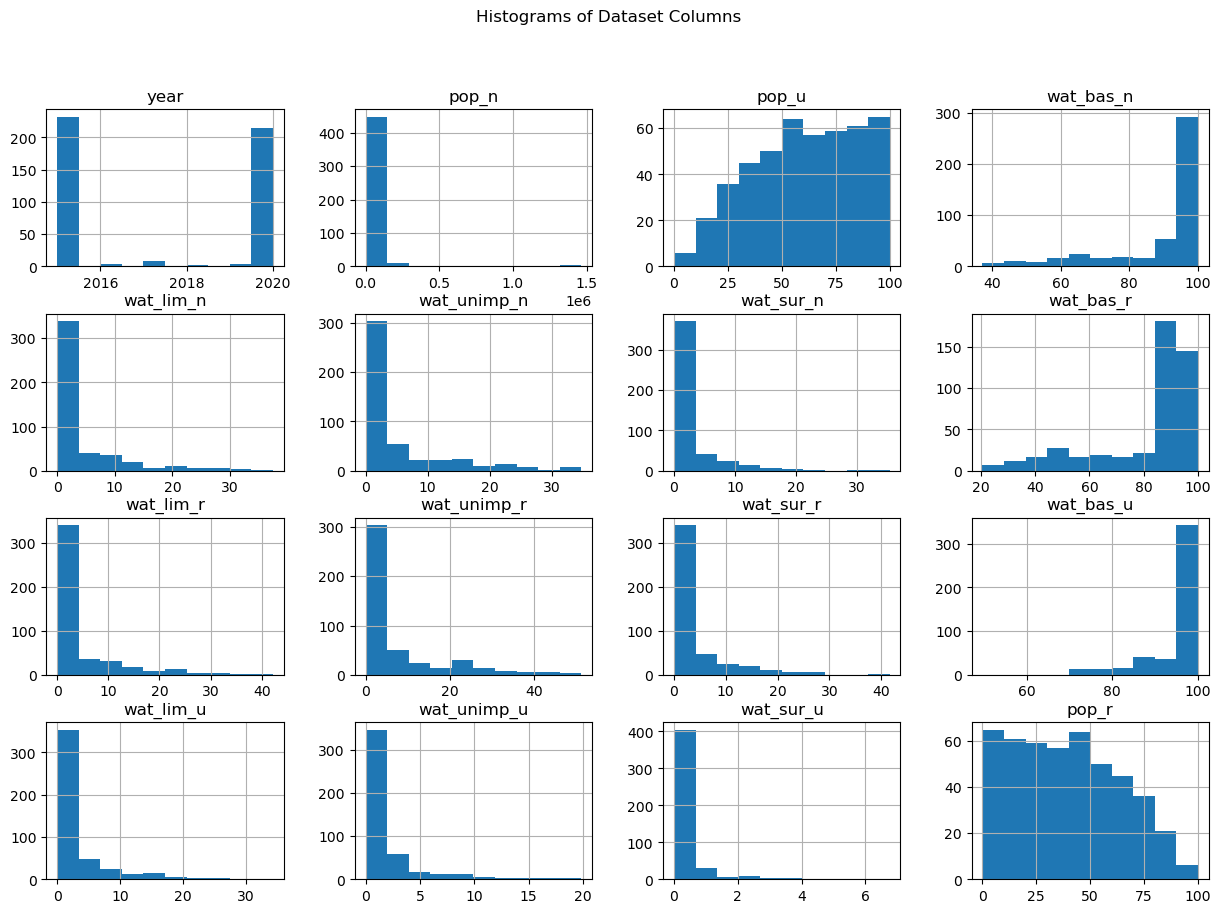

In [20]:
# Visualise columns in the dataset
def plot_histograms(data):
    numerical = data.select_dtypes(include=[np.number])
    numerical.hist(bins=10, figsize=(15, 10))
    plt.suptitle("Histograms of Dataset Columns")
    plt.show()

plot_histograms(df)

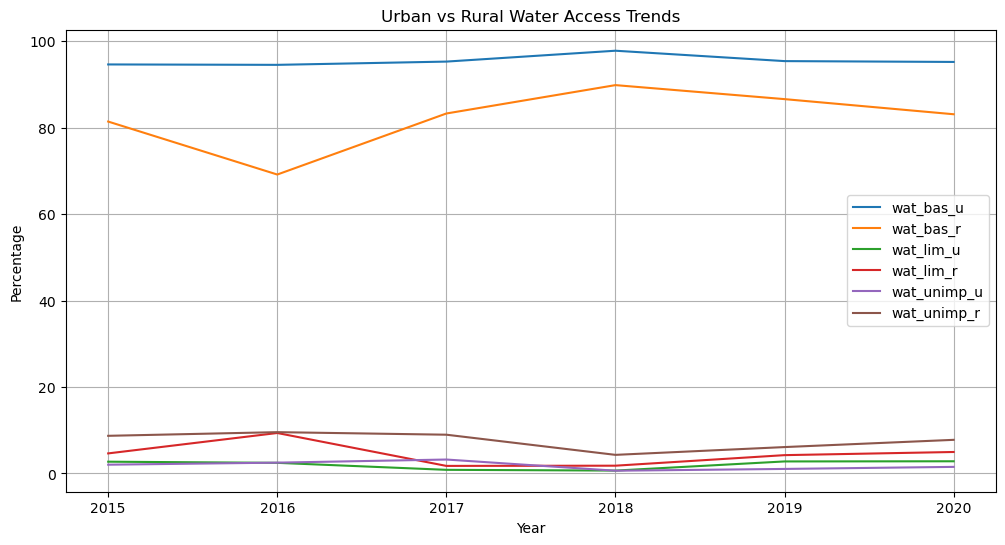

In [21]:
# Insights into Urban vs Rural water access trends
def urban_rural_trends(data):
    subset = data[['year', 'wat_bas_u', 'wat_bas_r', 'wat_lim_u', 'wat_lim_r', 'wat_unimp_u', 'wat_unimp_r']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(12, 6))
    for column in subset_mean.columns:
        plt.plot(subset_mean.index, subset_mean[column], label=column)

    plt.title('Urban vs Rural Water Access Trends')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

urban_rural_trends(df)

The data trends reveal significant disparities between urban and rural water access in the dataset. Urban areas consistently show high basic water access, maintaining a level near **95%–100%** throughout the years, with minimal changes. In contrast, rural areas exhibit more variability, particularly with a noticeable drop in **2016** followed by a gradual recovery. This pattern suggests that rural regions face greater challenges in accessing reliable water sources. Additionally, rural areas report higher water limitations and a significant spike in unimproved water access in **2016**, which contrasts sharply with the minimal unimproved water access observed in urban areas over the same period. These disparities highlight the need for targeted interventions to address rural water access challenges.

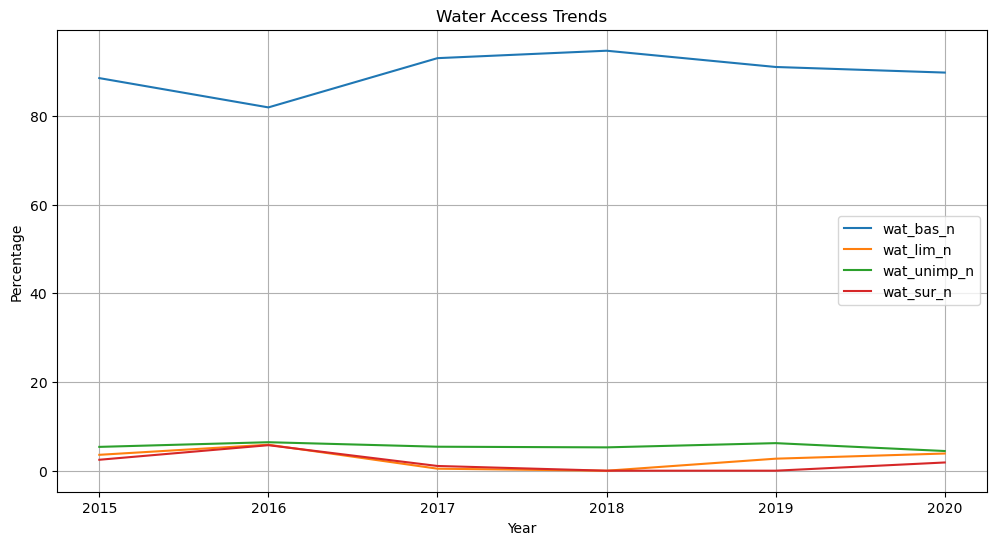

In [23]:
# Insights into Urban vs Rural water access trends
def total_water_trends(data):
    subset = data[['year', 'wat_bas_n', 'wat_lim_n', 'wat_unimp_n', 'wat_sur_n']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(12, 6))
    for column in subset_mean.columns:
        plt.plot(subset_mean.index, subset_mean[column], label=column)

    plt.title('Water Access Trends')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

total_water_trends(df)

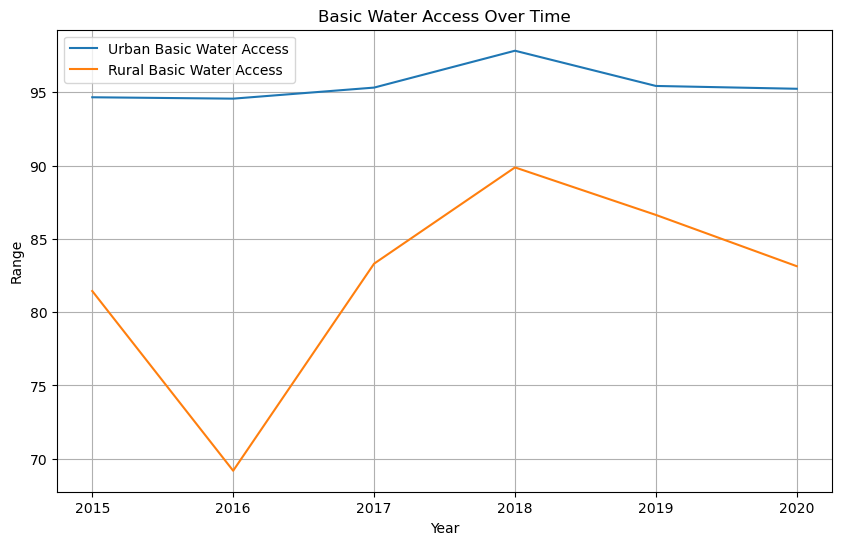

In [24]:
# Trend of basic water access over time
def basic_water_trend(data):
    subset = data[['year', 'wat_bas_u', 'wat_bas_r']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(10, 6))
    plt.plot(subset_mean.index, subset_mean['wat_bas_u'], label='Urban Basic Water Access')
    plt.plot(subset_mean.index, subset_mean['wat_bas_r'], label='Rural Basic Water Access')

    plt.title('Basic Water Access Over Time')
    plt.xlabel('Year')
    plt.ylabel('Range')
    plt.legend()
    plt.grid(True)
    plt.show()

basic_water_trend(df)

The graph shows a clear disparity between urban and rural basic water access from **2015 to 2020**. Urban water access remained consistently high, ranging between **94% and 97%**, with minor growth until 2018 and slight stabilization at **95%** afterward, reflecting a stable infrastructure. In contrast, rural water access fluctuated significantly, dropping to **69% in 2016**, recovering to **90% in 2018**, and then declining to **83% by 2020**. This highlights rural areas' volatility and the need for sustained investments to improve and stabilize water access, while urban systems remain robust and reliable.

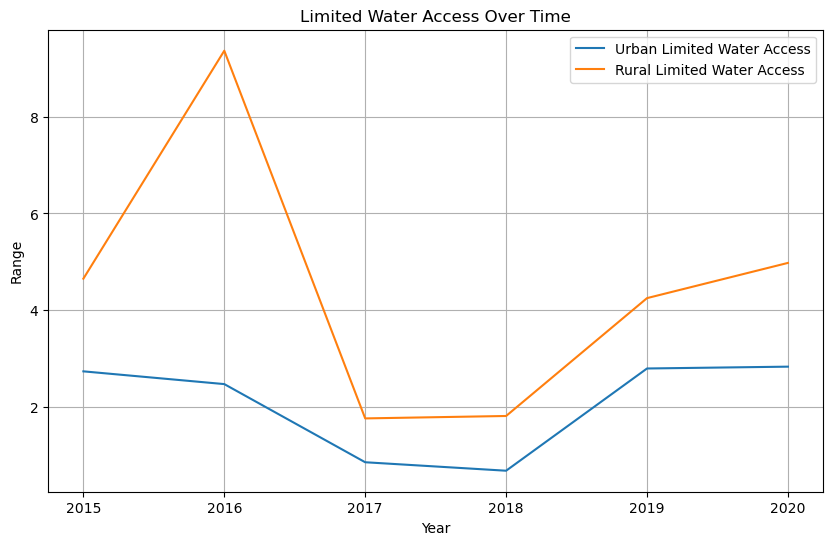

In [26]:
# Trend of limited water access over time
def limited_water_trend(data):
    subset = data[['year', 'wat_lim_u', 'wat_lim_r']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(10, 6))
    plt.plot(subset_mean.index, subset_mean['wat_lim_u'], label='Urban Limited Water Access')
    plt.plot(subset_mean.index, subset_mean['wat_lim_r'], label='Rural Limited Water Access')

    plt.title('Limited Water Access Over Time')
    plt.xlabel('Year')
    plt.ylabel('Range')
    plt.legend()
    plt.grid(True)
    plt.show()

limited_water_trend(df)

The graph shows that urban areas had consistently **lower limited water access** (1-3%) from **2015 to 2020**, reflecting stable infrastructure. Rural areas, however, experienced greater **fluctuations**, peaking at **9 in 2016**, dropping to **2 by 2017-2018**, and rising again to **5 in 2020**. This highlights the ongoing instability in rural water systems compared to urban areas.

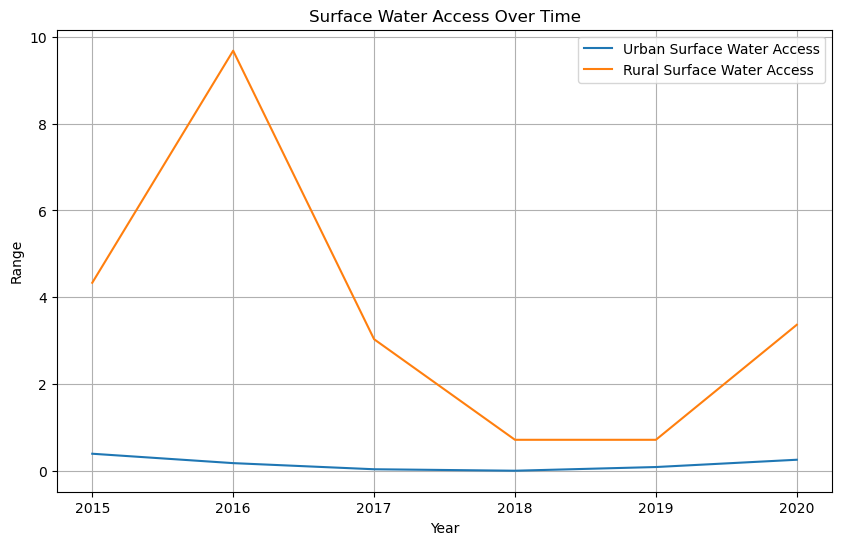

In [28]:
# Trend of surface water access over time
def surface_water_trend(data):
    subset = data[['year', 'wat_sur_u', 'wat_sur_r']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(10, 6))
    plt.plot(subset_mean.index, subset_mean['wat_sur_u'], label='Urban Surface Water Access')
    plt.plot(subset_mean.index, subset_mean['wat_sur_r'], label='Rural Surface Water Access')

    plt.title('Surface Water Access Over Time')
    plt.xlabel('Year')
    plt.ylabel('Range')
    plt.legend()
    plt.grid(True)
    plt.show()

surface_water_trend(df)

The graph compares surface water access for urban and rural areas over time **(2015–2020)**. Urban surface water access remains consistently low, showing minimal variation, while rural access fluctuates significantly. Rural water access peaked sharply in 2016 before declining substantially by **2018** and stabilizing at low levels in **2018–2019**, followed by a slight recovery in **2020**. The disparity highlights that rural areas experience greater variability and challenges in water access compared to more stable urban trends.

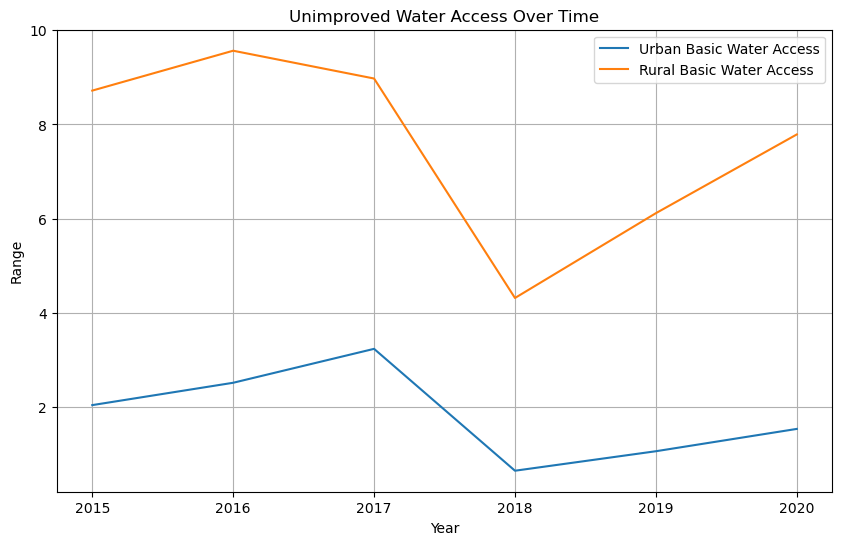

In [30]:
# Trend of unimproved water access over time
def unimproved_water_trend(data):
    subset = data[['year', 'wat_unimp_u', 'wat_unimp_r']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(10, 6))
    plt.plot(subset_mean.index, subset_mean['wat_unimp_u'], label='Urban Basic Water Access')
    plt.plot(subset_mean.index, subset_mean['wat_unimp_r'], label='Rural Basic Water Access')

    plt.title('Unimproved Water Access Over Time')
    plt.xlabel('Year')
    plt.ylabel('Range')
    plt.legend()
    plt.grid(True)
    plt.show()

unimproved_water_trend(df)

The graph shows that rural areas consistently have higher unimproved water access compared to urban areas, with significant fluctuations. Rural access declined sharply in **2018** before rising again, suggesting external interventions or anomalies, while urban areas exhibit a more stable trend with minor changes. The disparity highlights rural areas as more vulnerable, making them critical for predictive modeling. Key years like **2017–2018** could serve as markers for feature engineering, with trends and anomalies offering insights into socioeconomic or environmental factors impacting water access.

In [32]:
# Top countries with the highest basic water access (urban and rural)
def top_countries_by_water_access(data):
    latest_year = data['year'].max()
    latest_data = data[data['year'] == latest_year]

    top_urban = latest_data.nlargest(10, 'wat_bas_u')[['name', 'wat_bas_u']]
    top_rural = latest_data.nlargest(10, 'wat_bas_r')[['name', 'wat_bas_r']]

    print("Top 10 Countries with Highest Basic Water Access (Urban):\n", top_urban)
    print("\nTop 10 Countries with Highest Basic Water Access (Rural):\n", top_rural)

top_countries_by_water_access(df)

Top 10 Countries with Highest Basic Water Access (Urban):
            name  wat_bas_u
0       Croatia      100.0
4       Andorra      100.0
5       Finland      100.0
6   Switzerland      100.0
9        Greece      100.0
10      Germany      100.0
11    Greenland      100.0
14  New Zealand      100.0
16      Denmark      100.0
17        Malta      100.0

Top 10 Countries with Highest Basic Water Access (Rural):
            name  wat_bas_r
4       Andorra      100.0
5       Finland      100.0
6   Switzerland      100.0
9        Greece      100.0
10      Germany      100.0
11    Greenland      100.0
14  New Zealand      100.0
16      Denmark      100.0
17        Malta      100.0
22       Tuvalu      100.0


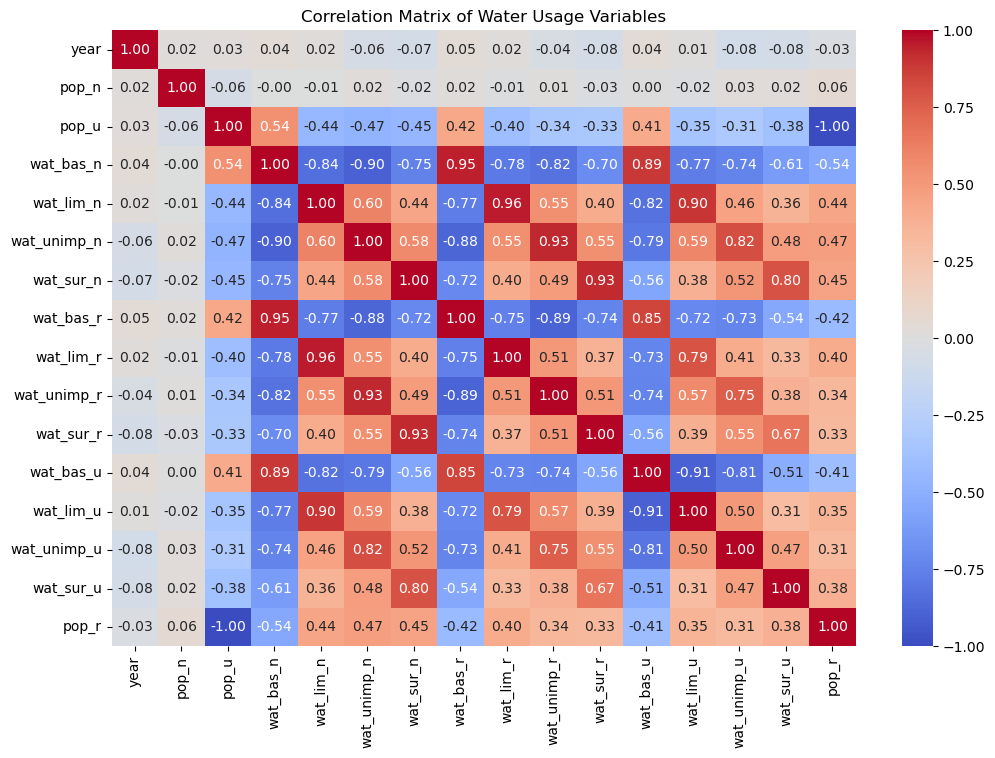

In [33]:
# Correlation analysis between variables
def correlation_analysis(data):
    # Select only numeric columns for correlation analysis
    numeric_data = data.select_dtypes(include=np.number)

    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_data.corr()  # Calculate correlation on numeric data
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Water Usage Variables')
    plt.show()

correlation_analysis(df)

The correlation matrix shows that rural water access strongly influences national trends, with rural basic and limited water access correlating highly at **0.95** and **0.96**. Negative correlations, such as between basic and unimproved access (**-0.90**), indicate that improving basic access reduces unimproved access. Urban and rural populations are inversely related (**-1.00**) and show distinct water access patterns. Overall, rural areas are key drivers of national water trends, highlighting the importance of improving rural water access.

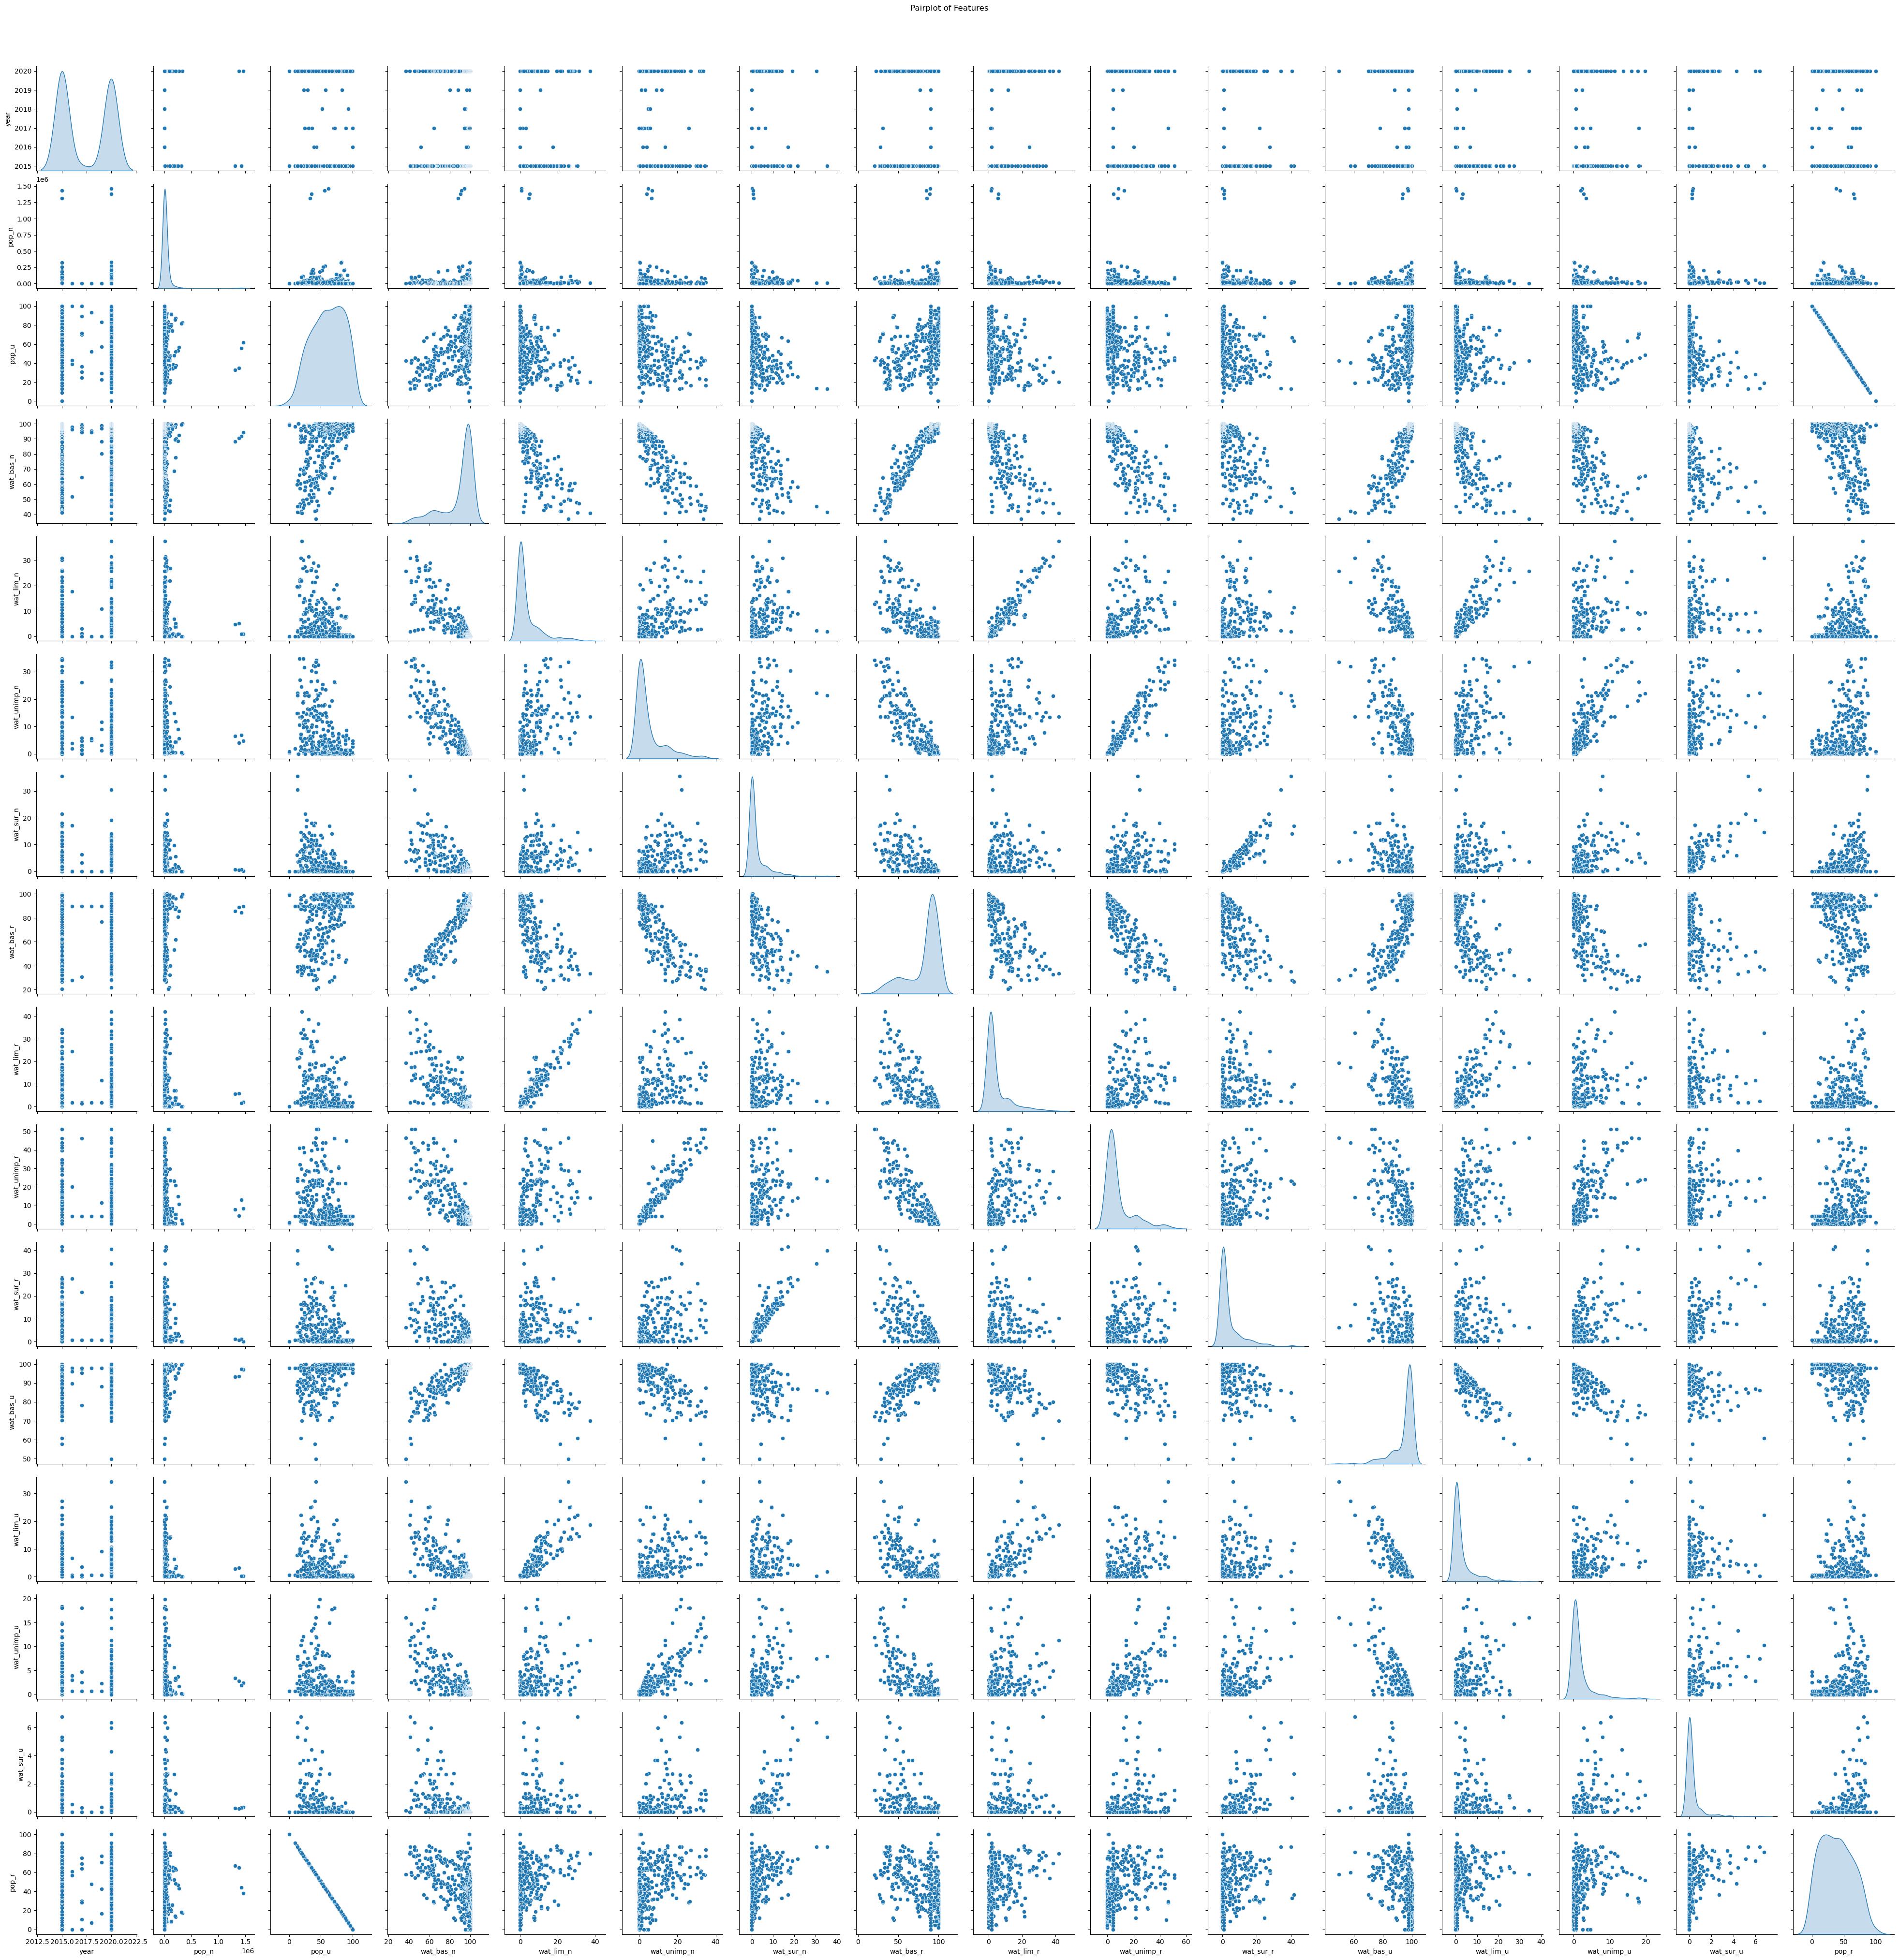

In [35]:
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

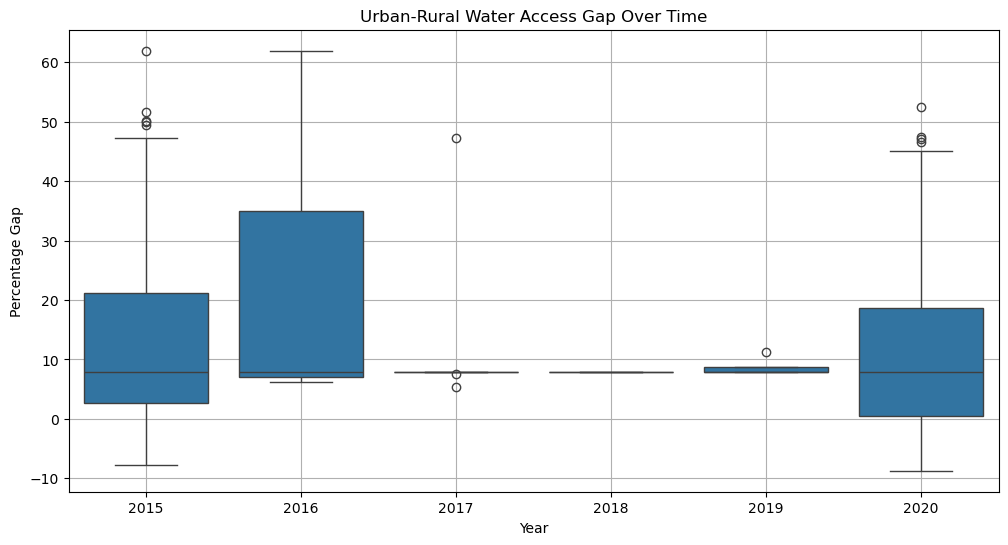

In [36]:
# Equity Analysis: Urban vs Rural Gap
def equity_analysis(data):
    data['urban_rural_gap'] = data['wat_bas_u'] - data['wat_bas_r']
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='year', y='urban_rural_gap', data=data)
    plt.title('Urban-Rural Water Access Gap Over Time')
    plt.xlabel('Year')
    plt.ylabel('Percentage Gap')
    plt.grid(True)
    plt.show()
    data.drop(columns=['urban_rural_gap'], inplace=True)

equity_analysis(df)

In [37]:
# Countries with consistent improvement
def consistent_improvement(data):
    improvement = data.groupby('name').apply(lambda x: (x['wat_bas_u'].iloc[-1] - x['wat_bas_u'].iloc[0]))
    top_improved = improvement.nlargest(10)
    print("Countries with the highest improvement in Urban Basic Water Access:\n", top_improved)

consistent_improvement(df)

Countries with the highest improvement in Urban Basic Water Access:
 name
South Sudan      9.310827
Guinea-Bissau    2.359383
Niger            1.694699
Benin            1.039143
Pakistan         0.778359
Nepal            0.717038
Chad             0.561429
China            0.404771
Bangladesh       0.328002
Namibia          0.277270
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_13692\1160419261.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  improvement = data.groupby('name').apply(lambda x: (x['wat_bas_u'].iloc[-1] - x['wat_bas_u'].iloc[0]))


**Normalizing features**

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['name']))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

Optimal number of clusters (knee point): 4


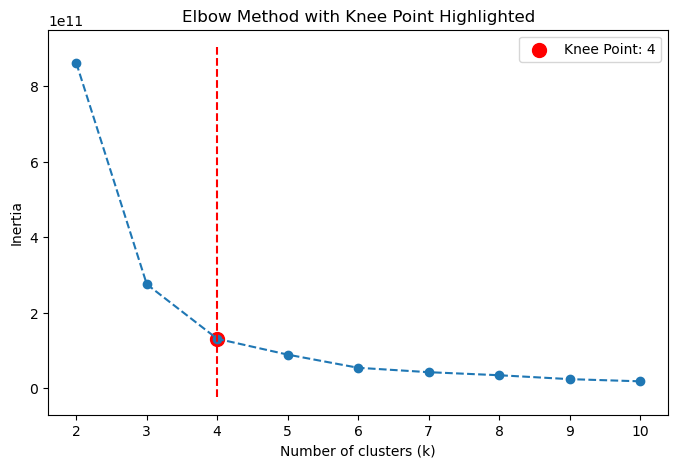

In [40]:
# # Define the range of cluster numbers to try
inertia = []
k_values = range(2, 11)
# Compute KMeans for each k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop(columns=['name']))
    inertia.append(kmeans.inertia_)


knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
print("Optimal number of clusters (knee point):", knee_locator.knee)

# Visualize the knee point
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.vlines(knee_locator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.scatter(knee_locator.knee, knee_locator.knee_y, s=100, color='red', label=f'Knee Point: {knee_locator.knee}')
plt.title('Elbow Method with Knee Point Highlighted')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

In [41]:
hy = {"n_init": 60, "random_state": 43}
km = KMeans(n_clusters=4, **hy)

# Fit KMeans and predict the labels
df['clusters'] = km.fit_predict(X_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


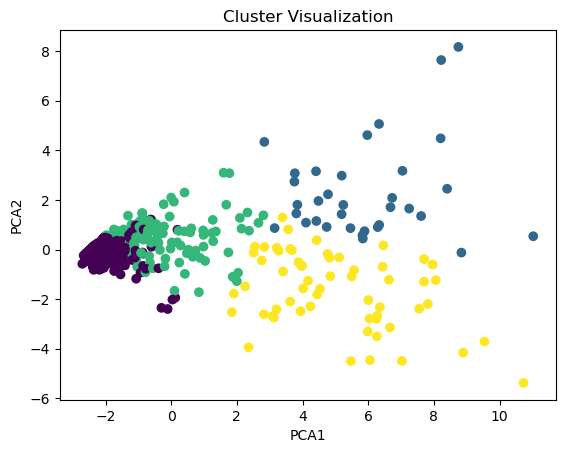

In [42]:
pca = PCA(n_components=4)
reduced_features = pca.fit_transform(X_scaled)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['clusters'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster Visualization')
plt.show()

In [43]:
print(df['clusters'].value_counts())

clusters
0    219
2    152
3     59
1     34
Name: count, dtype: int64


In [44]:
labels = df['clusters']

In [45]:
wcss = km.inertia_  # Within-cluster sum of squares
sil = silhouette_score(X_scaled, labels)  # Silhouette score
cal = calinski_harabasz_score(X_scaled, labels)  # Calinski-Harabasz score

print(f"Within-Cluster Sum of Squares: {wcss}")
print(f"Silhouette Score: {sil}")
print(f"Calinski-Harabasz Score: {cal}")

Within-Cluster Sum of Squares: 3157.9824353255
Silhouette Score: 0.2614056518191533
Calinski-Harabasz Score: 207.13310053058228


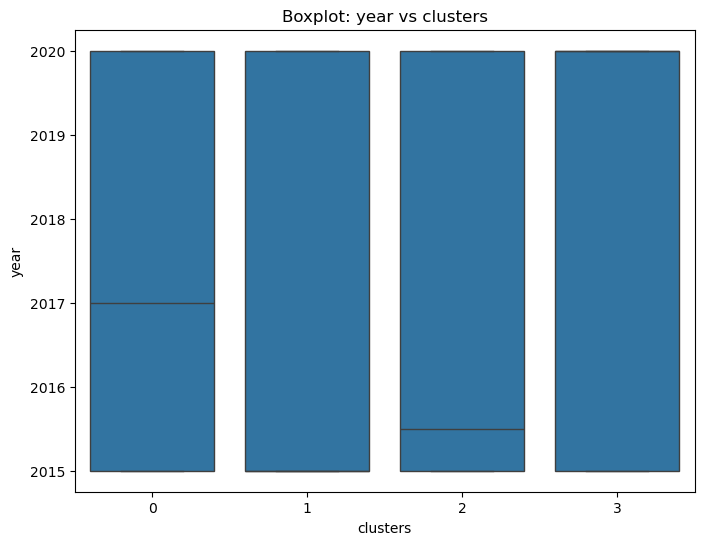

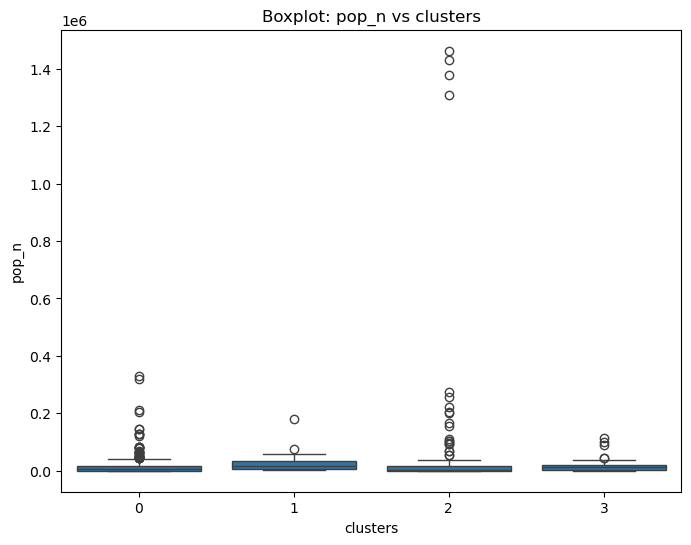

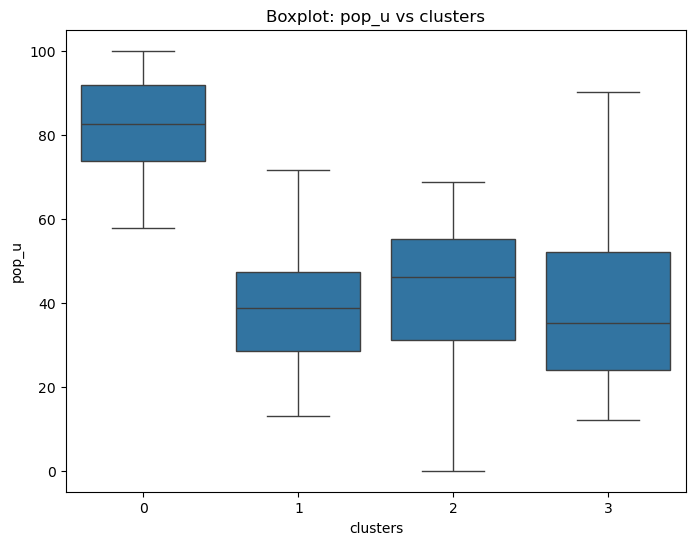

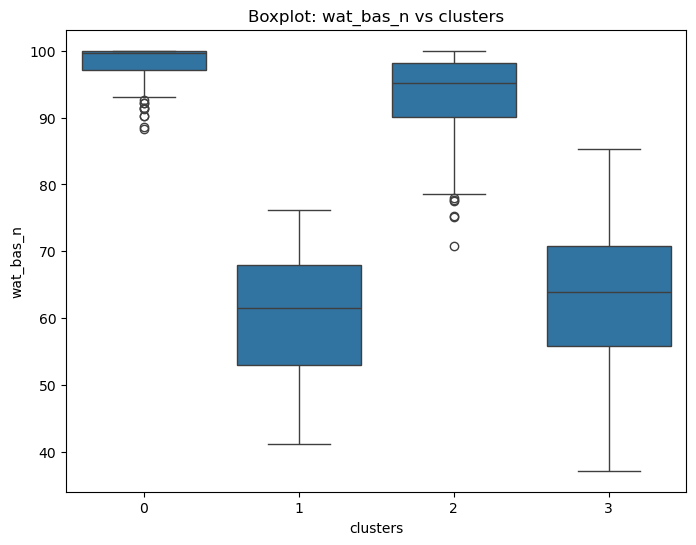

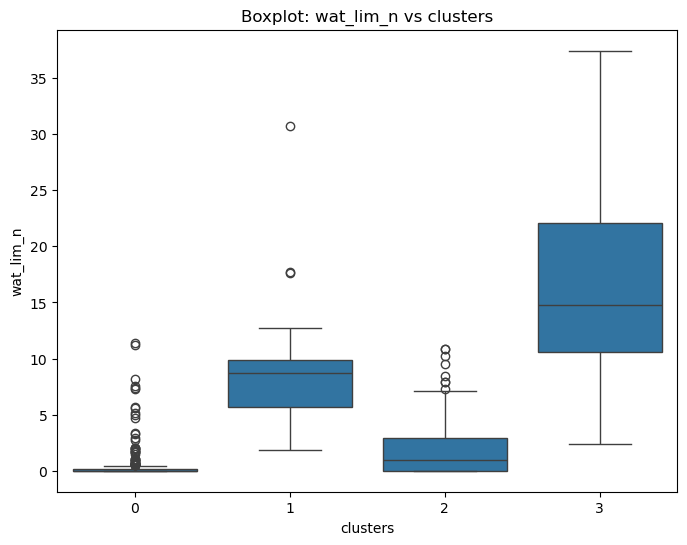

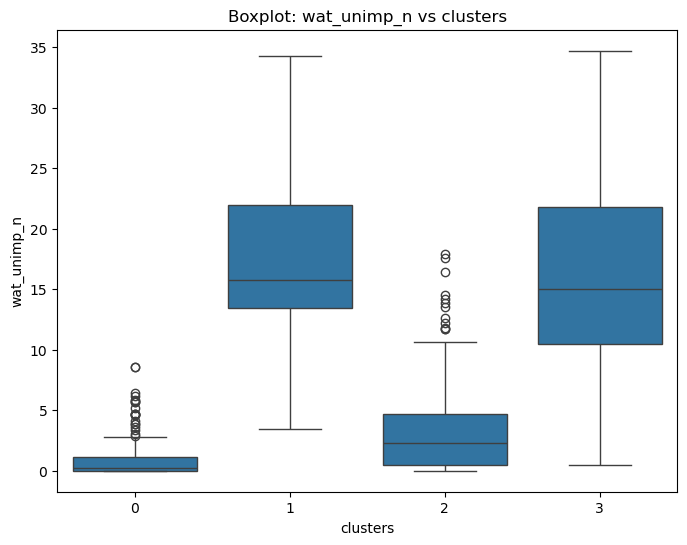

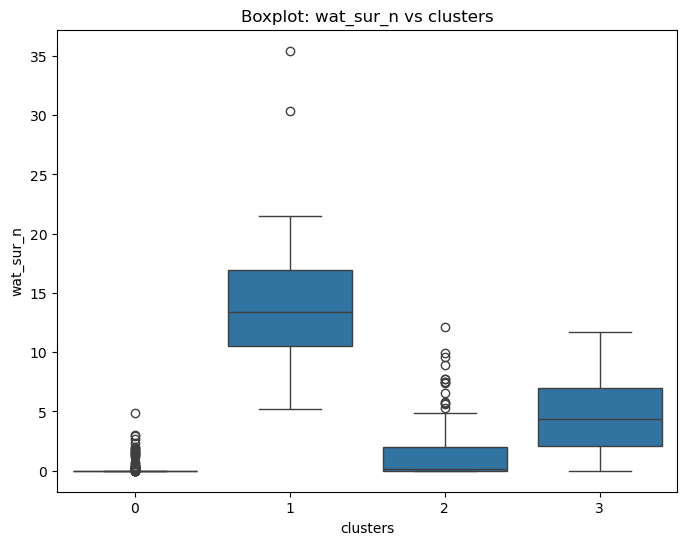

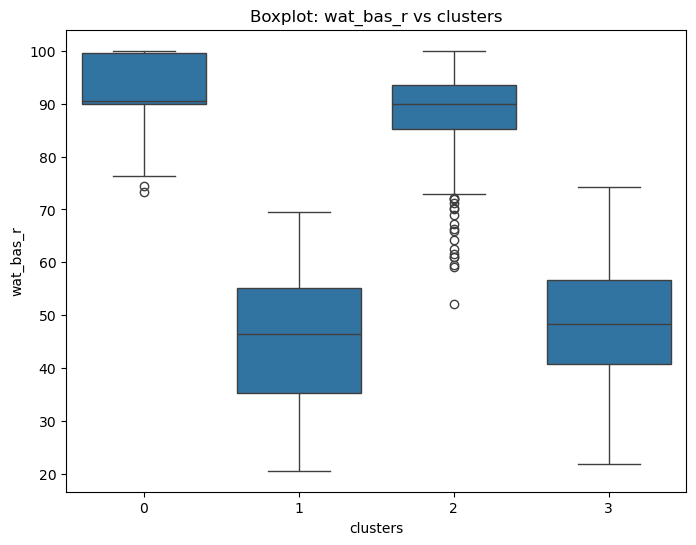

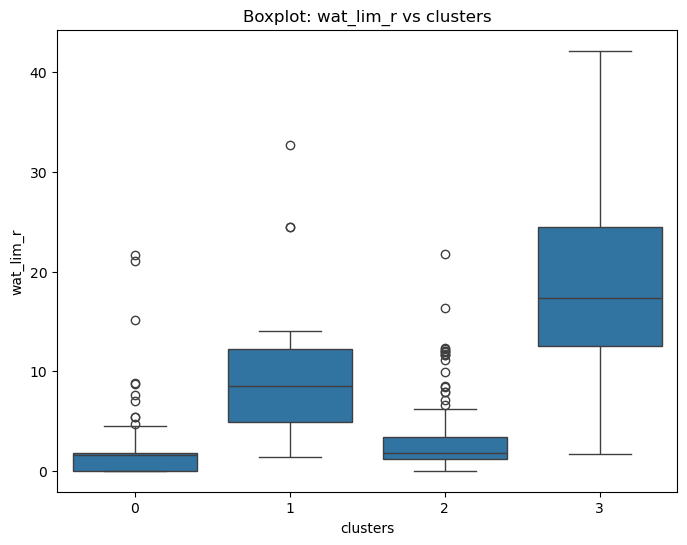

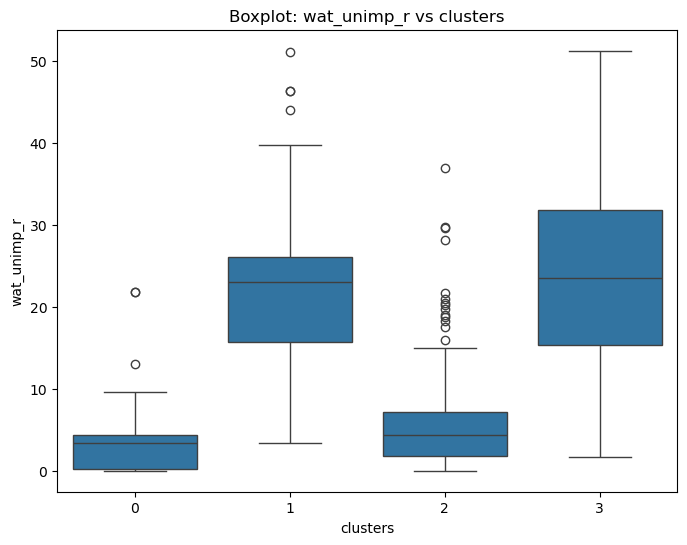

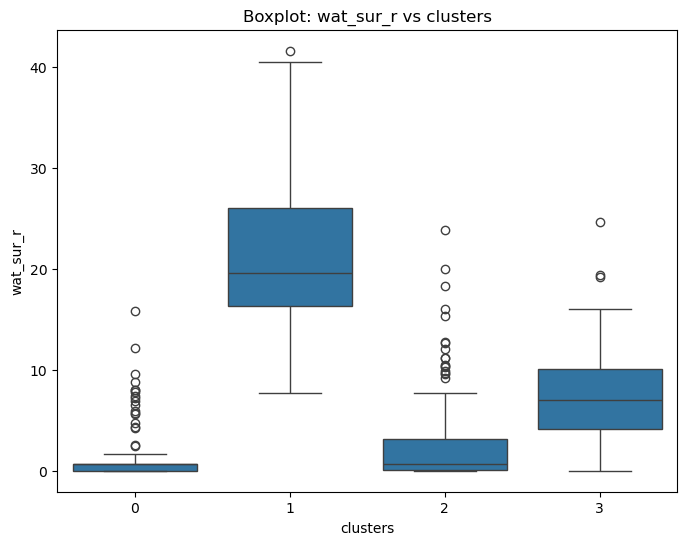

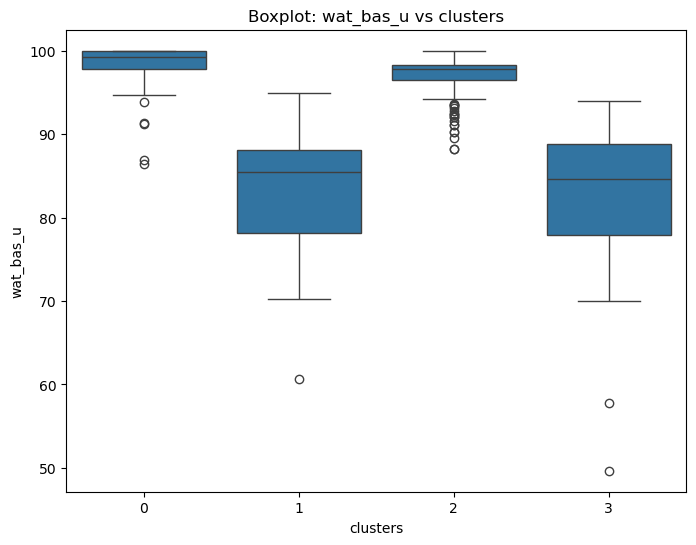

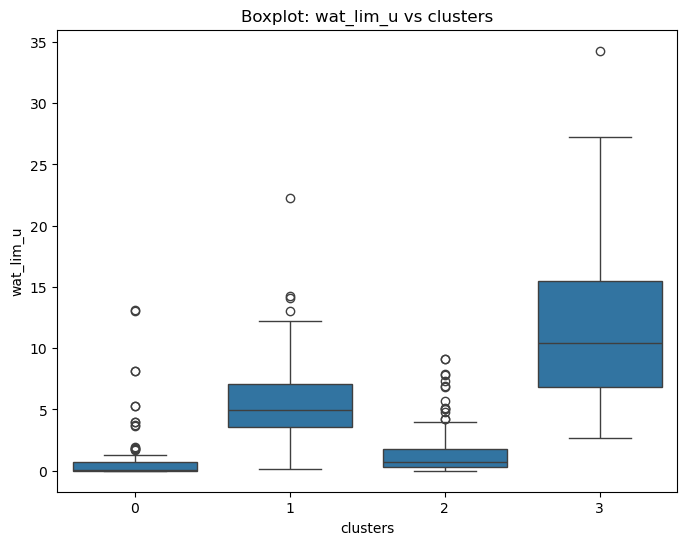

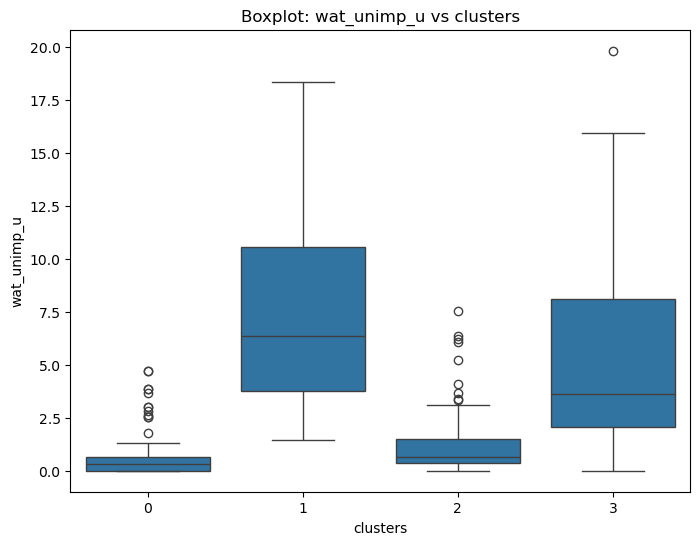

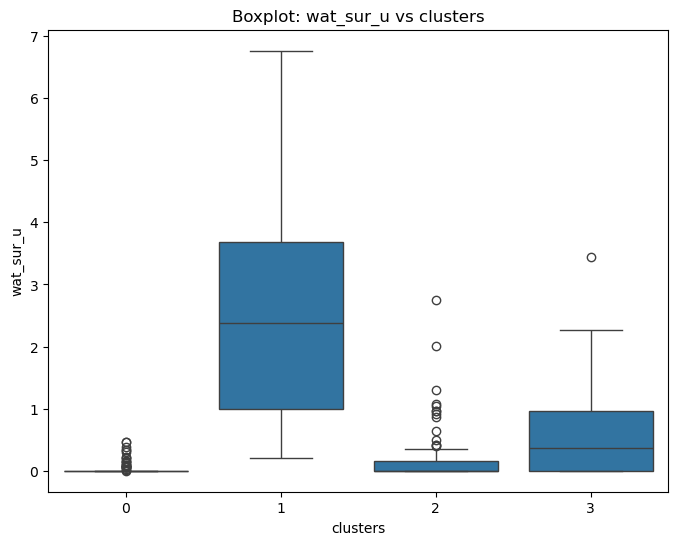

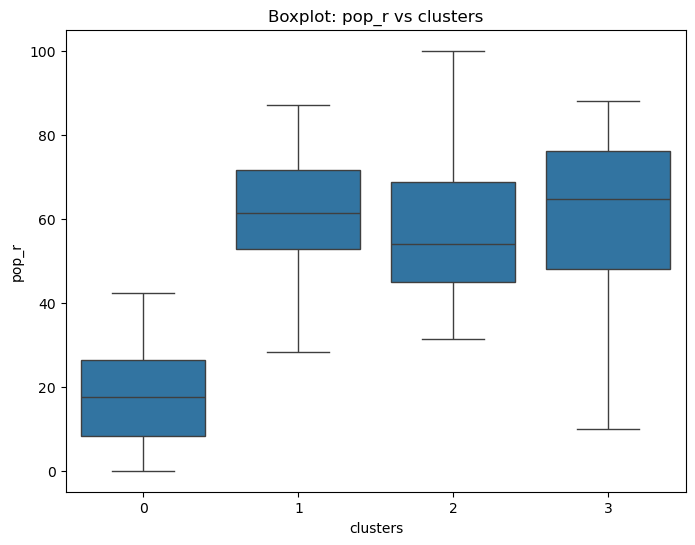

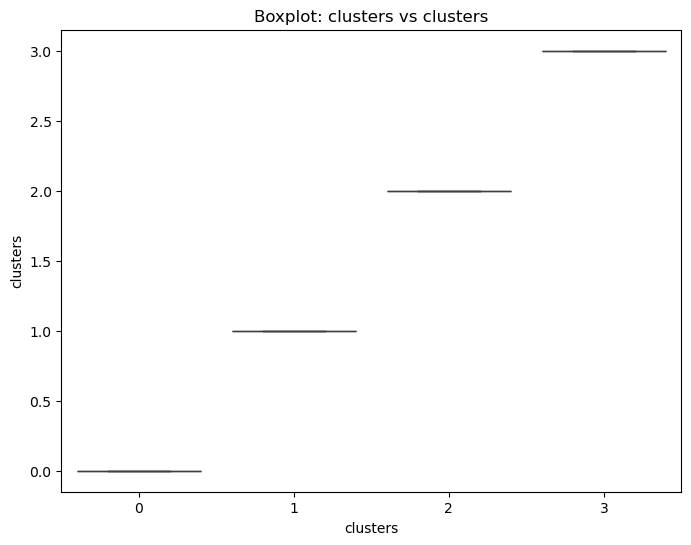

In [46]:
# Specify the categorical column
categorical_col = 'clusters'

# Get the numerical columns by excluding the categorical column
numerical_cols = df.select_dtypes(include='number').columns

# Loop through numerical columns to create boxplots
for num_col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_col, y=num_col, data=df)
    plt.title(f'Boxplot: {num_col} vs {categorical_col}')
    plt.show()

### **Cluster 0**:
1. **Urban Population**:  
   Cluster 0 has the **highest median urban population**, indicating that these areas are predominantly urbanized. Urbanization often correlates with better infrastructure, including water supply systems.
   
2. **Basic Water Access**:  
   Cluster 0 also has the **highest median for basic water access**, meaning that most people in these areas have access to **improved water sources** such as piped water, boreholes, or protected wells, and the collection time is minimal (less than 30 minutes round trip). This highlights well-developed infrastructure and convenient access to clean water.

3. **Limited Water**:  
   The **lowest median for limited water** access indicates that very few people rely on water sources requiring **more than 30 minutes round-trip collection time**. This further reflects the efficiency and proximity of water services in these regions.

4. **Unimproved Water**:  
   Cluster 0 has the **lowest median for unimproved water**, meaning a minimal reliance on **unprotected dug wells or springs**, which often carry contamination risks. Water quality is generally good.

5. **Surface Water**:  
   Cluster 0 has the **lowest median reliance on surface water** (e.g., rivers, lakes, or ponds). This suggests that advanced infrastructure has significantly reduced dependency on natural water bodies.

6. **Rural Population**:  
   The **lowest rural population** in this cluster supports the conclusion that it represents highly urbanized areas.

**Detailed Interpretation**:  
Cluster 0 represents regions that are **highly urbanized**, where the majority of the population benefits from **efficient, high-quality water services**, with minimal reliance on time-intensive or unsafe water sources. These regions likely have strong governance, infrastructure investment, and socioeconomic development.

---

### **Cluster 1**:
1. **Urban Population**:  
   Cluster 1 has a **low urban population** and a **high rural population**, indicating that it is largely rural.

2. **Basic Water Access**:  
   The **lowest median for basic water access** suggests that very few people in these areas have convenient access to **improved water sources**. Infrastructure is limited, making access to clean and safe water challenging.

3. **Limited Water**:  
   A **high median for limited water** indicates that many people in this cluster must travel **long distances (over 30 minutes round trip)** to fetch water, even from improved sources. This reflects infrastructure gaps and time-consuming water collection processes.

4. **Unimproved Water**:  
   Cluster 1 has the **highest median for unimproved water**, showing significant reliance on **unprotected sources** such as dug wells and springs. These are vulnerable to contamination and present health risks.

5. **Surface Water**:  
   The **highest median reliance on surface water** (e.g., rivers, lakes, and canals) highlights that many people in these regions rely directly on **untreated water bodies**, reflecting a severe lack of infrastructure and access to safe water.

**Detailed Interpretation**:  
Cluster 1 represents **highly rural regions with inadequate infrastructure** for water access. People here face significant barriers, including long travel times for water collection and heavy reliance on unsafe or untreated water sources. These regions likely experience underdevelopment, poverty, and limited government intervention.

---

### **Cluster 2**:
1. **Urban Population**:  
   Cluster 2 has a **moderate urban population**, suggesting a mix of urban and rural characteristics. It represents transitional or semi-urban areas.

2. **Basic Water Access**:  
   A **high median for basic water access**, though not as high as Cluster 0, indicates that most people here have access to **improved water sources** with relatively short collection times.

3. **Limited Water**:  
   A **moderate median for limited water** suggests some people still face challenges in water collection time, requiring **over 30 minutes round trip**. This reflects partial infrastructure development.

4. **Unimproved Water**:  
   A **low unimproved water median** indicates that only a small fraction of the population relies on **unprotected wells or springs**. Water quality is generally better compared to Clusters 1 and 3.

5. **Surface Water**:  
   Surface water usage is **lower than in Clusters 1 and 3**, reflecting less dependence on natural water bodies due to better infrastructure.

**Detailed Interpretation**:  
Cluster 2 represents **semi-urban or developing regions** with a balance of rural and urban populations. Water infrastructure is moderately developed, offering improved water access for most people, though some challenges persist in water availability and collection times.

---

### **Cluster 3**:
1. **Urban Population**:  
   Cluster 3 has a **low urban population**, similar to Cluster 1, indicating primarily rural areas.

2. **Basic Water Access**:  
   A **low median for basic water access** shows that improved water sources are less accessible in these areas, but slightly better than Cluster 1.

3. **Limited Water**:  
   The **highest median for limited water** indicates that many people rely on improved sources but must travel long distances (more than 30 minutes round trip), reflecting severe logistical challenges.

4. **Unimproved Water**:  
   A **high median for unimproved water**, second only to Cluster 1, indicates a significant reliance on **unprotected wells or springs**, exposing these populations to health risks.

5. **Surface Water**:  
   Surface water reliance is **high** but slightly less than Cluster 1, reflecting a similar dependence on **untreated water bodies** due to inadequate infrastructure.

**Detailed Interpretation**:  
Cluster 3 represents **rural regions with moderate challenges** in water access, including long collection times, high reliance on unimproved sources, and significant use of surface water. It is slightly better off than Cluster 1 but still lags significantly behind Clusters 0 and 2.

---

### **Key Takeaways**:
- **Cluster 0**: Urbanized regions with strong infrastructure and safe, convenient water access.
- **Cluster 1**: Poor, rural regions with heavy reliance on unimproved or surface water and long collection times.
- **Cluster 2**: Transitional regions with a balance of urban and rural populations and moderately developed water infrastructure.
- **Cluster 3**: Predominantly rural areas facing water access and quality challenges but slightly better off than Cluster 1.

In [48]:
df.drop(columns=['name'], inplace=True)

In [49]:
X = df.drop(columns=['clusters'])

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, labels, test_size=0.2, random_state=42)

In [52]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = random_forest.predict(X_test)

In [54]:
accuracy = random_forest.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 95.70%


In [55]:
score = random_forest.score(X_train, y_train)
rep = classification_report(y_test, y_pred)
conf = {"X": X_train, "y": y_train}

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       1.00      0.83      0.91        12
           2       0.94      0.94      0.94        17
           3       0.85      1.00      0.92        17

    accuracy                           0.96        93
   macro avg       0.95      0.94      0.94        93
weighted avg       0.96      0.96      0.96        93



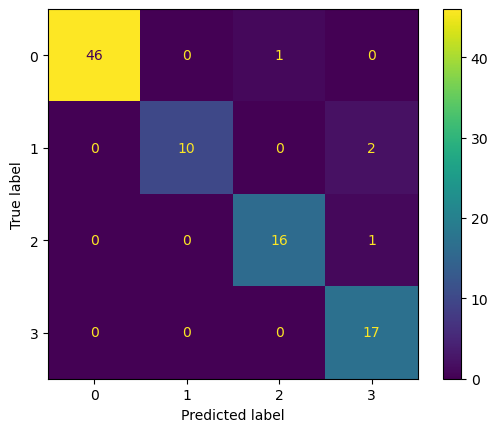

In [57]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()

In [58]:
importances = random_forest.feature_importances_

In [59]:
feature_importance_df = pd.DataFrame({'Feature': X.columns,'Importance': importances})

In [60]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [61]:
feature_importance_df

Feature  Importance
2         pop_u    0.248308
15        pop_r    0.229658
3     wat_bas_n    0.101191
7     wat_bas_r    0.078451
11    wat_bas_u    0.062134
4     wat_lim_n    0.050497
6     wat_sur_n    0.046252
10    wat_sur_r    0.033052
9   wat_unimp_r    0.028279
12    wat_lim_u    0.026066
8     wat_lim_r    0.025655
5   wat_unimp_n    0.021203
14    wat_sur_u    0.020991
13  wat_unimp_u    0.015446
1         pop_n    0.012050
0          year    0.000766

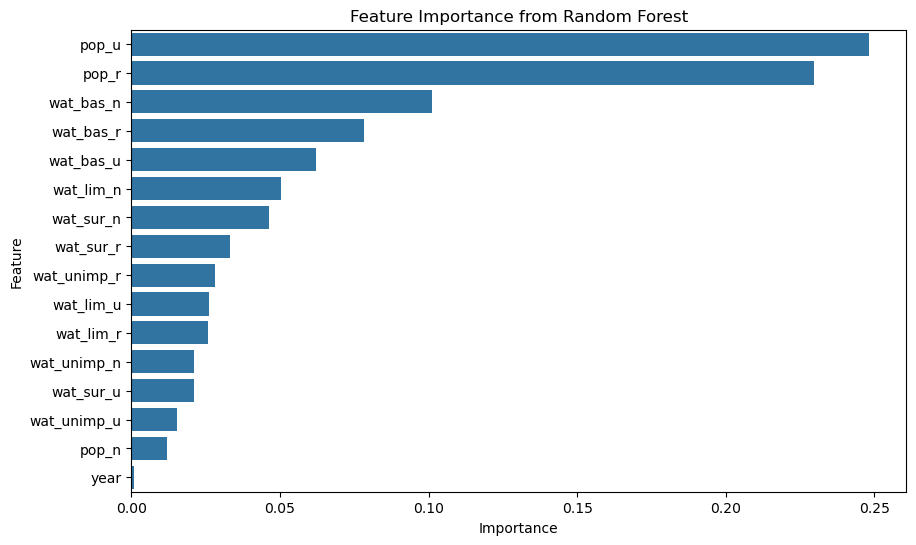

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [63]:
important_features = feature_importance_df.head(11)
important_features_names = important_features['Feature'].tolist()
X_importannt = df[important_features_names]

In [64]:
scaler = StandardScaler()
inportant = scaler.fit_transform(X_importannt)

In [65]:
important_df = pd.DataFrame(inportant, columns=X_importannt.columns, index=X_importannt.index)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(important_df, labels, test_size=0.2, random_state=42)

In [67]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = random_forest.predict(X_test)

In [69]:
accuracy = random_forest.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 94.62%


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.91      0.83      0.87        12
           2       0.94      0.94      0.94        17
           3       0.84      0.94      0.89        17

    accuracy                           0.95        93
   macro avg       0.92      0.92      0.92        93
weighted avg       0.95      0.95      0.95        93



In [71]:
joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [72]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### **Report on Water Data Summary (2015-2020)**

This report provides a comprehensive summary of water data from 2015 to 2020, categorized into national, rural, and urban datasets. It covers key variables such as basic water sources, limited water sources, unimproved water sources, and surface water, along with their respective availability and utilization across different regions. Additionally, the evaluation of the classification model used for this analysis is presented, including performance metrics and feature importance analysis.

---

### **1. Year Overview**
The dataset spans from 2015 to 2020, with an average year of approximately 2017. The data is evenly distributed, with a spread of 2.46 years, ensuring a representative analysis over this period.

---

### **2. Population (pop_u)**
On average, 60.89% of the population has access to the analyzed water sources. However, this percentage varies significantly (with a standard deviation of 25.05%), indicating disparities in water access across regions.

---

### **3. Water Sources: National, Rural, and Urban Breakdown**

#### **National Overview**
- **Basic Water Sources (wat_bas_n)**: 89.17% of the population has access to basic water sources. Access varies widely across regions, with some areas having as low as 37.20% access and others achieving 100%.
- **Limited Water Sources (wat_lim_n)**: 3.68% of the population relies on limited water sources, with some regions experiencing up to 37.43% limited access.
- **Unimproved Water Sources (wat_unimp_n)**: 4.98% of the population depends on unimproved water sources. Access ranges from 0% to 34.72%.
- **Surface Water (wat_sur_n)**: Only 2.24% of the population depends on surface water, with variations from 0% to 35.44%.

#### **Rural Areas**
- **Basic Water Sources (wat_bas_r)**: In rural areas, 79.45% have access to basic water sources, though access ranges from as low as 20.62% to 100%.
- **Limited Water Sources (wat_lim_r)**: 5.85% of rural water sources are limited, with some regions experiencing up to 42.16% limited access.
- **Unimproved Water Sources (wat_unimp_r)**: 9.71% of the rural population relies on unimproved water sources, with access ranging from 0% to 51.22%.
- **Surface Water (wat_sur_r)**: 5.12% of rural water sources are surface water, with access varying from 0% to 41.63%.

#### **Urban Areas**
- **Basic Water Sources (wat_bas_u)**: Urban areas show 94.17% access to basic water sources, with the range being from 49.66% to 100%.
- **Limited Water Sources (wat_lim_u)**: Only 3.29% of urban water sources are limited, significantly lower than rural areas, with the range from 0% to 34.28%.
- **Unimproved Water Sources (wat_unimp_u)**: A mere 2.14% of urban water sources are unimproved, with access ranging from 0% to 19.84%.

---

### **4. Model Evaluation and Performance Metrics**

The model's performance was evaluated using the following metrics: **precision**, **recall**, **f1-score**, and **accuracy**. These metrics help measure how well the model classified the data, both before and after feature importance was applied.

#### **Explanation of Metrics**:
- **Precision**: Measures how many of the predicted positive cases were correct.
- **Recall**: Measures how many of the actual positive cases were identified.
- **F1-Score**: The harmonic mean of precision and recall, offering a balanced view of both.
- **Accuracy**: The overall percentage of correct predictions made by the model.

---

#### **Performance Before Feature Importance**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 0.98   | 0.99     | 47      |
| 1     | 1.00      | 0.83   | 0.91     | 12      |
| 2     | 0.94      | 0.94   | 0.94     | 17      |
| 3     | 0.85      | 1.00   | 0.92     | 17      |

- **Accuracy**: 96%  
  This indicates the model correctly predicted 96% of the data points.

- **Macro Average**:  
  - **Precision**: 95%  
  - **Recall**: 94%  
  - **F1-Score**: 94%  
  This indicates balanced performance across all classes.

- **Weighted Average**:  
  - **Precision**: 96%  
  - **Recall**: 96%  
  - **F1-Score**: 96%  
  This reflects strong performance, accounting for class distribution.

---

#### **Performance After Feature Importance**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 0.98   | 0.99     | 47      |
| 1     | 0.91      | 0.83   | 0.87     | 12      |
| 2     | 0.94      | 0.94   | 0.94     | 17      |
| 3     | 0.84      | 0.94   | 0.89     | 17      |

- **Accuracy**: 95%  
  The accuracy decreased slightly after feature selection, showing the model is still performing well with minor adjustments.

- **Macro Average**:  
  - **Precision**: 92%  
  - **Recall**: 92%  
  - **F1-Score**: 92%  
  These metrics show a slight decline but still indicate good performance across all classes.

- **Weighted Average**:  
  - **Precision**: 95%  
  - **Recall**: 95%  
  - **F1-Score**: 95%  
  After feature importance, the model still performs strongly, especially for more frequent classes.

---

### **5. Feature Selection and Importance**

Feature selection helps identify the most important variables influencing the model’s predictions. The following 11 features were found to be the most significant:

| Feature   | Importance Score |
|-----------|------------------|
| pop_u     | 0.248308         |
| pop_r     | 0.229658         |
| wat_bas_n | 0.101191         |
| wat_bas_r | 0.078451         |
| wat_bas_u | 0.062134         |
| wat_lim_n | 0.050497         |
| wat_sur_n | 0.046252         |
| wat_sur_r | 0.033052         |
| wat_unimp_r | 0.028279       |
| wat_lim_u | 0.026066         |
| wat_lim_r | 0.025655         |

The most important features were **pop_u** (population in urban areas) and **pop_r** (population in rural areas), highlighting the importance of population data in determining water access levels.

---

### **6. Clustering Evaluation Metrics**

The clustering model was assessed using the following metrics:

- **Within-Cluster Sum of Squares**: 3157.98  
  A lower value suggests more compact clusters.
  
- **Silhouette Score**: 0.2614  
  A moderate score, indicating the clusters are somewhat separated but could be improved.
  
- **Calinski-Harabasz Score**: 207.13  
  A moderate score, indicating reasonable but potentially improvable cluster definitions.

---

### **Conclusion**

- **National, Rural, and Urban Data**: Water access is notably better in urban areas, with higher access to basic water sources and fewer limitations compared to rural regions.
- **Model Performance**: The classification model demonstrated strong performance, with an accuracy of 96% before feature selection and 95% after. Feature selection led to slight changes but helped balance precision and recall.
- **Feature Importance**: The most significant factors for predicting water access were population data, particularly for urban and rural areas, underlining their importance in understanding water availability.

[Prediction Link](https://water-analysis-ml-peniel-nigel.streamlit.app/)